<a href="https://colab.research.google.com/github/hannahcanon09/sales-predictions/blob/main/CANON_Project_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 1: SALES PREDICTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = '/content/drive/MyDrive/Colab Notebooks/Data /sales_predictions_2023.csv'

In [3]:
# read csv file

df= pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# To identify the number of columns and rows in the dataframe

df.shape

# 8525 rows and 12 columns

(8523, 12)

In [5]:
# To identify the datatypes of each variable

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# To identify if there are any duplicates

df.duplicated().any()

False

In [7]:
# There are no duplicates

# to double check if there are indeed no duplicates
df[df.duplicated(keep = False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [8]:
# To identify missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Item Weight column number of missing values

df['Item_Weight'].isna().sum()

1463

In [10]:
# To locate where these missing values are

missing_item_weight = df['Item_Weight'].isna()

df[missing_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
# col Outlet Size number of missing values

df['Outlet_Size'].isna().sum()

2410

In [12]:
 # To locate where these missing values are

missing_outlet_size = df['Outlet_Size'].isna()

df[missing_outlet_size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [13]:
# Get the percentage of missing values
1463/8523

0.1716531737651062

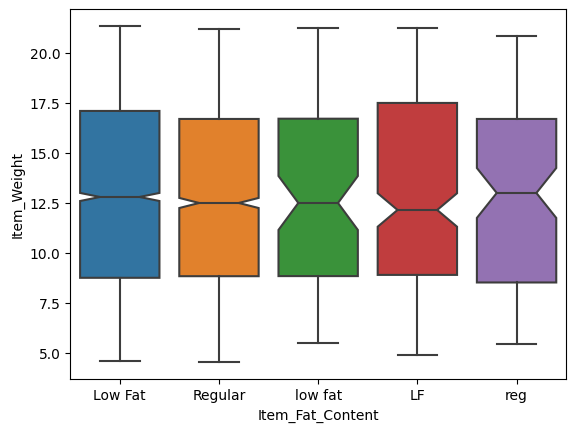

In [14]:
# Use seaborn for the boxplot to identify distribution and skewness of col Item_Weight
# Plotting boxplot for cols Item_Weight and Item_Fat_Content

sns.boxplot(data = df, x='Item_Fat_Content', y = 'Item_Weight', notch = True);

The boxplot shows that there is a normal distribution. The data is not skewed, where it has little to no visible outliers. As such, the mean will be used to fill in missing values in column "Item_Weight"

In [15]:
#Compute for the mean of col Item_Weight

item_weight_mean = df['Item_Weight'].mean()
item_weight_mean

12.857645184135976

In [16]:
# Fill in missing values using the mean of col Item_Weight

df['Item_Weight'].fillna(value='item_weight_mean', inplace=True)

In [17]:
# Double check if there are still any missing values in col Item_Weight

df['Item_Weight'].isna().sum()

0

In [18]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [19]:
# Convert col Item_Weight into float to be able to boxplot and check skew

df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce').fillna(0).astype(float)

In [20]:
# Check if conversion worked

print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


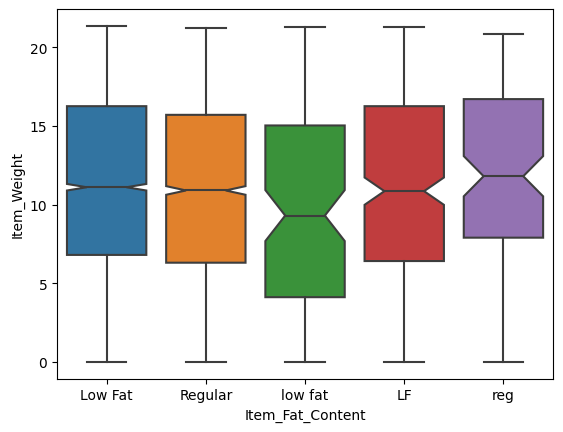

In [21]:
# Check if distribution changed after filling in missing values in col Item_Weight

sns.boxplot(data = df, x='Item_Fat_Content', y = 'Item_Weight', notch = True);

There were no significant changes to the distribution of the data despite filling in missing values using the mean of column Item_Weight

In [22]:
regular = df.loc[df['Item_Fat_Content']== 'Regular']
low_fat = df.loc[df['Item_Fat_Content']== 'Low Fat']

In [23]:
# Get the percentage of missing values for col Outlet_Size
2410/8523

0.2827642848762173

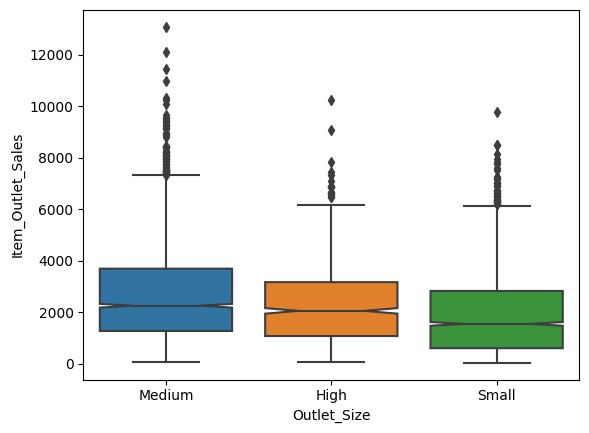

In [24]:
# Plotting boxplot for cols Outlet_Size and Item_Outlet_Sales

sns.boxplot(data = df, x='Outlet_Size', y = 'Item_Outlet_Sales', notch = True);

The boxplot shows a positively skewed dataset. Thus, the median will be used to fill in missing values because of the high number of outliers present in the dataset. The median is less susceptible to the outliers than the mean.

In [25]:
#Compute for the mode of col Outlet_Size

outlet_size_mode = df['Outlet_Size'].mode()
outlet_size_mode

0    Medium
Name: Outlet_Size, dtype: object

In [26]:
# Fill in missing values using the mode of col Outlet_Size

df['Outlet_Size'].fillna(value='outlet_size_mode', inplace=True)

In [27]:
# Double check if there are still any missing values in col Outlet_Size

df['Outlet_Size'].isna().sum()

0

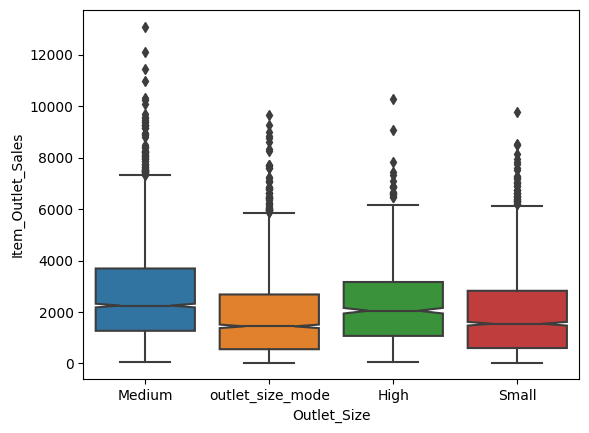

In [28]:
# Plotting boxplot for cols Outlet_Size and Item_Outlet_Sales to check if distribution changed

# Dataset is still positvely skewed

sns.boxplot(data = df, x='Outlet_Size', y = 'Item_Outlet_Sales', notch = True);

There were no significant changes to the distribution of the data despite filling in missing values using the mode of column Outlet_Size.

In [29]:
# To check for inconsistencies for data types object
# Item_Fat_Content              object
# Item_Type                     object
# Outlet_Identifier             object
# Outlet_Size                   object
# Outlet_Location_Type          object
# Outlet_Type                   object

# col: Item_Fat_Content

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
# Replace LF, low fat, Reg and reg into Low Fat and Regular to make col Item_Fat_Content consistent

# Replace LF into Low Fat
df['Item_Fat_Content'].replace ('LF', 'Low Fat', inplace = True)

# Replace low fat into Low Fat
df['Item_Fat_Content'].replace ('low fat', 'Low Fat', inplace = True)

# Replace Reg into Regular
df['Item_Fat_Content'].replace ('Reg', 'Regular', inplace = True)

# Replace reg into Regular
df['Item_Fat_Content'].replace ('reg', 'Regular', inplace = True)

In [31]:
# Double check if replacing worked
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
# To check for inconsistencies for data types object

# col: Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [33]:
# # To check for inconsistencies for data types object

# col: Outlet_Identifier

df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [34]:
# To check for inconsistencies for data types object

# col: Outlet_Size

df['Outlet_Size'].value_counts()

Medium              2793
outlet_size_mode    2410
Small               2388
High                 932
Name: Outlet_Size, dtype: int64

In [35]:
# To check for inconsistencies for data types object

# col: Outlet_Location_Type

df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [36]:
# To check for inconsistencies for data types object

# col: Outlet_Type

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [37]:
# Summary statistics for numerical columns (mean, median, mode)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


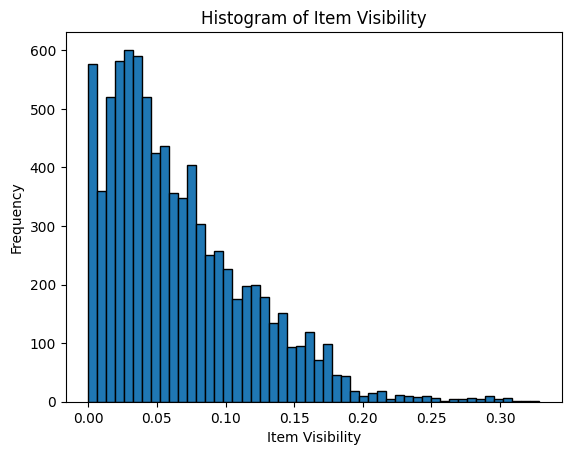

The mean of Item Visibility is 0.06613202877895108


In [44]:
# Plot histograms to view distributions of various features

# plot histogram for col Item_Weight
df['Item_Visibility'].hist(bins = 'auto', edgecolor = 'black', grid = False);

# labels and chart title
plt.xlabel ('Item Visibility')
plt.ylabel ('Frequency')
plt.title ('Histogram of Item Visibility')

#plot the histogram
plt.show();

# print the mean
mean_item_visibility = df['Item_Visibility'].mean()
print (f'The mean of Item Visibility is {mean_item_visibility}')

The histogram is right skewed. With relatively low percentages of item visibility, it shows that the visibility of the items are evenly distributed. Only a selected few have higher visibility than others, which can be due to a promotion, sale or higher demand of these items.

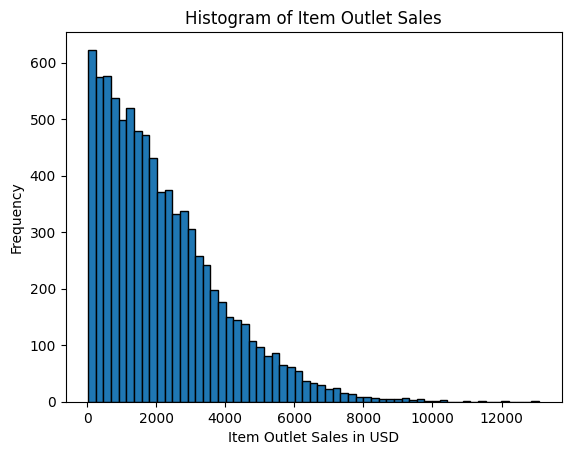

The mean of Item Outlet Sales is $ 2181.288913575032
The mode of Item Outlet Sales is $ 0    958.752
Name: Item_Outlet_Sales, dtype: float64


In [57]:
# plot histogram for col Item_Outlet Sales
df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black', grid = False);

# labels and chart title
plt.xlabel ('Item Outlet Sales in USD')
plt.ylabel ('Frequency')
plt.title ('Histogram of Item Outlet Sales')

#plot the histogram
plt.show();

# print the mean
mean_item_outlet_sales = df['Item_Outlet_Sales'].mean()
print (f'The mean of Item Outlet Sales is $ {mean_item_outlet_sales}')

# print the mode
mode_item_outlet_sales = df['Item_Outlet_Sales'].mode()
print (f'The mode of Item Outlet Sales is $ {mode_item_outlet_sales}')

In [55]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

The histogram is right skewed. This means that the data is concentrated on the left with a tail on the right. This means that some stores have better sales than most. The stores with sales on the concentrated area can employ similar strategies than those on the right tail to improve their sales.

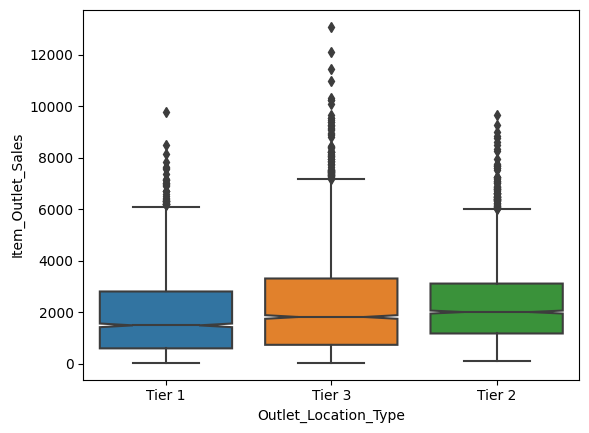

In [58]:
# More boxplots to view statistical summaries

# Boxplot for Outlet Location Type and Item Outlet Sales
sns.boxplot(data = df, x='Outlet_Location_Type', y = 'Item_Outlet_Sales', notch = True);

The histogram shows Tier 3 to have better sales than Tier 1 and Tier 2. Although, all three boxplots shows sales ranging from a thousand dollars to three thousand dollars, Tier 2 has a slightly higher mean than Tier 1 and Tier 3.

<ipython-input-47-9ef96f8c0a24>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


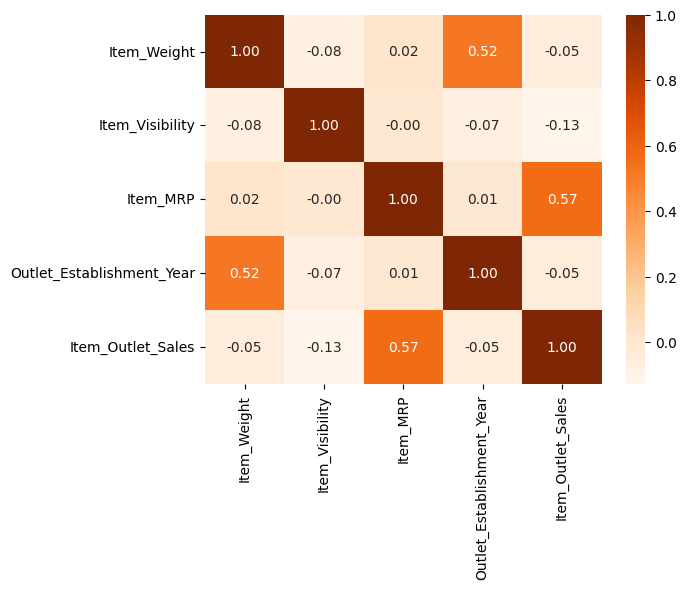

In [47]:
# Heatmap to show correlation between features

corr=df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot = True, fmt = '.2f');

There is a moderately strong positive relationship between the establishment year of the outlet and the weight of its items sold. The more recent (or older) the establishment of the outlet is, the heavier (or lighter) the weight of the items sold.


Moreover, there is also a moderately strong posiitve relationship between max retail price (MRP) of items sold and the outlets' sales. The higher (or cheaper) the MRP is, the higher (or lower) the outlet sales are.


Other features have no relationships to one another.